## Lab 02 Information

In this lab, you will be asked to use scikit-learn to create classification and regression models using a variety of machine learning algorithms. 

I will provide you with a copy of the [scikit-learn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf) during the lab. 

The following import statements will be provided to you. To use the `plot_regions()` function, you will need to place the file `ClassificationPlotter.py` into the same folder as this notebook.

Except where specifically noted below, you will be asked to generate code similar to what is found in this notebook. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from ClassificationPlotter import plot_regions
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'ClassificationPlotter'

# Part 1: Classification

## Generate Data

Code for creating a dataset will be provided to you. 

In [ ]:
np.random.seed(1467)
X, y = make_classification(n_samples=500, n_classes=4, n_features=2, n_informative=2, class_sep=0.8,
                           n_redundant=0, n_clusters_per_class=1, )
y = y

plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='rainbow')
plt.show()

## Create Train/Test Split

You will be asked to create a train/test split. You will be told the size to use for the test set. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

print(y_train.shape)
print(y_test.shape)

## Logistic Regression

When creating a Logistic Regression mode, there will be no hyper-parameters that you are asked to specify. 

In [ ]:
lr_mod = LogisticRegression()
lr_mod.fit(X_train, y_train)

print('Training Accuracy:', lr_mod.score(X_train, y_train))
print('Testing Accuracy:', lr_mod.score(X_test, y_test))

In [ ]:
y_pred_lr = lr_mod.predict(X_test)
print(classification_report(y_test, y_pred_lr))

In [ ]:
print(confusion_matrix(y_test, y_pred_lr))

I will provide you with code for using the `plot_regions()` function, as in the cell below.

In [ ]:
plot_regions(lr_mod, X_train, y_train, num_ticks=200)

You will be provided with one or more specific points for which you will asked to generate predictions. 

In [8]:
print('Prediction for (4,-2.5):', lr_mod.predict([[4,-2.5]]))

Prediction for (4,-2.5): [2]


## K-Nearest Neighbors

When creating a KNN model, you will be provided with the number of neighbors to use in the algorithm. No other hyper-parameters will be used. 

In [9]:
knn_mod = KNeighborsClassifier(n_neighbors=6)
knn_mod.fit(X_train, y_train)

print('Training Accuracy:', knn_mod.score(X_train, y_train))
print('Testing Accuracy:', knn_mod.score(X_test, y_test))

Training Accuracy: 0.915
Testing Accuracy: 0.85


In [10]:
y_pred_knn = knn_mod.predict(X_test)
print(classification_report(y_test, y_pred_knn))

             precision    recall  f1-score   support

          0       0.79      0.92      0.85        25
          1       0.78      0.72      0.75        25
          2       1.00      0.92      0.96        26
          3       0.83      0.83      0.83        24

avg / total       0.85      0.85      0.85       100



In [11]:
print(confusion_matrix(y_test, y_pred_knn))

[[23  0  0  2]
 [ 5 18  0  2]
 [ 1  1 24  0]
 [ 0  4  0 20]]


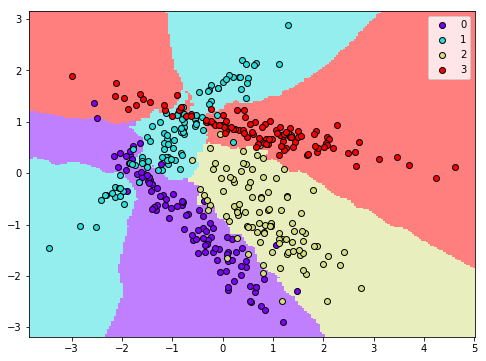

In [12]:
plot_regions(knn_mod, X_train, y_train, num_ticks=200)

In [13]:
print('Prediction for (4,-2.5):', knn_mod.predict([[4,-2.5]]))

Prediction for (4,-2.5): [2]


## Decision Tree

You will be asked to specifty two parameters for the decision tree model: `max_depth` and `min_samples_leaf`. These values will be provided to you.

In [14]:
tree_mod = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)
tree_mod.fit(X_train, y_train)

print('Training Accuracy:', tree_mod.score(X_train, y_train))
print('Testing Accuracy:', tree_mod.score(X_test, y_test))

Training Accuracy: 0.9075
Testing Accuracy: 0.75


In [15]:
y_pred_tree = tree_mod.predict(X_test)
print(classification_report(y_test, y_pred_tree))

             precision    recall  f1-score   support

          0       0.69      0.80      0.74        25
          1       0.68      0.52      0.59        25
          2       0.83      0.92      0.87        26
          3       0.78      0.75      0.77        24

avg / total       0.75      0.75      0.74       100



In [16]:
print(confusion_matrix(y_test, y_pred_tree))

[[20  1  2  2]
 [ 8 13  1  3]
 [ 1  1 24  0]
 [ 0  4  2 18]]


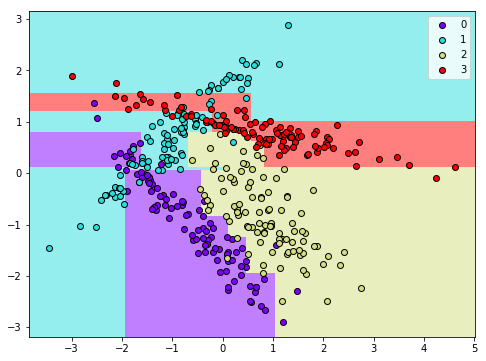

In [17]:
plot_regions(tree_mod, X_train, y_train, num_ticks=200)

In [18]:
print('Prediction for (4,-2.5):', tree_mod.predict([[4,-2.5]]))

Prediction for (4,-2.5): [2]


## Support Vector Machine

For support vector machines, you will be asked to specify a kernel from among the following options: `'linear'`, `'poly'`, or `'rbg'`. 

For each model, you will be asked to specify the value of `C`, which is the multiplier for the penalties associated with margin violations. 

For the `poly` kernel, you will be asked to specify a value for the `degree` parameter. 

For the `rbf` kernel, you will be asked to specify a value for the `gamma` parameter. 

In [19]:
svm_mod = SVC(kernel='rbf', gamma=0.2, C=100)
svm_mod.fit(X_train, y_train)

print('Training Accuracy:', svm_mod.score(X_train, y_train))
print('Testing Accuracy:', svm_mod.score(X_test, y_test))

Training Accuracy: 0.9025
Testing Accuracy: 0.82


In [20]:
y_pred_svm = svm_mod.predict(X_test)
print(classification_report(y_test, y_pred_svm))

             precision    recall  f1-score   support

          0       0.72      0.92      0.81        25
          1       0.73      0.64      0.68        25
          2       0.92      0.92      0.92        26
          3       0.95      0.79      0.86        24

avg / total       0.83      0.82      0.82       100



In [21]:
print(confusion_matrix(y_test, y_pred_svm))

[[23  0  2  0]
 [ 8 16  0  1]
 [ 1  1 24  0]
 [ 0  5  0 19]]


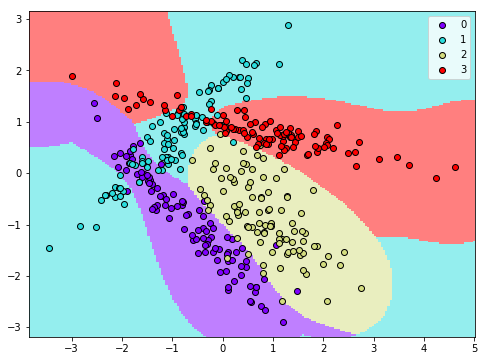

In [22]:
plot_regions(svm_mod, X_train, y_train, num_ticks=200)

In [23]:
print('Prediction for (4,-2.5):', svm_mod.predict([[4,-2.5]]))

Prediction for (4,-2.5): [1]


# Part 2: Regression

## Generate Data

As with the classification tasks above, a cell will be provided to you that generates a dataset for use in regression tasks. 

In [24]:
np.random.seed(7438)

X = np.random.uniform(0,10,12*1000).reshape(1000,12)
y = 5.7 + 2.8*X[:,3] - 0.64*X[:,6]**3 + 0.37*X[:,1]*X[:,9]**2 + np.random.normal(0,10,1000)

## Create Train/Test Split

You will be asked to create a train/test split. The size of the test set will be provided. 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

print(y_train.shape)
print(y_test.shape)

(800,)
(200,)


## Ordinary Least Squares Regression

With ordinary least squares regression (i.e. regular linear regression), there are no hyper-parameters to specify. 

In [26]:
ols_mod = LinearRegression()
ols_mod.fit(X_train, y_train)

print('Training r-squared:', ols_mod.score(X_train, y_train))
print('Testing r-squared:', ols_mod.score(X_test, y_test))

Training r-squared: 0.832048257315
Testing r-squared: 0.825492841149


In [27]:
print('Model intercept:', ols_mod.intercept_)
print('Model coefficients:', ols_mod.coef_)

Model intercept: 36.9705828176
Model coefficients: [  0.61249865  13.59900727  -0.54572565   3.31370678  -1.72938841
  -0.971654   -55.75426808   0.90021024  -1.935067    19.83695258
  -0.90570896  -0.84629906]


In [28]:
p1 = [1, 5, 3, 8, 3, 6, 9, 2, 2, 4, 1, 3]
p2  = [9, 7, 8, 4, 5, 6, 3, 4, 8, 4, 5, 3]
print('Prediction for p1 and p2:', ols_mod.predict([p1, p2]))

Prediction for p1 and p2: [-308.52241614   25.22614651]


## Lasso Regression 

For a lasso regression model, you will need to specify the regularization parameter `alpha`. This provides the weight that is applied to the penalty term associated with having large coefficients. 

In [29]:
lasso_mod = Lasso(alpha=20)
lasso_mod.fit(X_train, y_train)

print('Training r-squared:', lasso_mod.score(X_train, y_train))
print('Testing r-squared:', lasso_mod.score(X_test, y_test))

Training r-squared: 0.824525830324
Testing r-squared: 0.815457835043


In [30]:
print('Model intercept:', lasso_mod.intercept_)
print('Model coefficients:', lasso_mod.coef_)

Model intercept: 36.6215374484
Model coefficients: [  0.          10.90410195  -0.           0.86650881  -0.          -0.
 -53.35750527   0.          -0.          17.24763705  -0.          -0.        ]


In [31]:
p1 = [1, 5, 3, 8, 3, 6, 9, 2, 2, 4, 1, 3]
p2  = [9, 7, 8, 4, 5, 6, 3, 4, 8, 4, 5, 3]
print('Prediction for p1 and p2:', lasso_mod.predict([p1, p2]))

Prediction for p1 and p2: [-313.15288158   25.33431871]


## K-Nearest Neighbors

When creating a KNN model, you will be provided with the number of neighbors to use in the algorithm. No other hyper-parameters will be used. 

In [32]:
knn_mod = KNeighborsRegressor(n_neighbors=10)
knn_mod.fit(X_train, y_train)

print('Training r-squared:', knn_mod.score(X_train, y_train))
print('Testing r-squared:', knn_mod.score(X_test, y_test))


Training r-squared: 0.767769995199
Testing r-squared: 0.741715328452


In [33]:
p1 = [1, 5, 3, 8, 3, 6, 9, 2, 2, 4, 1, 3]
p2  = [9, 7, 8, 4, 5, 6, 3, 4, 8, 4, 5, 3]
print('Prediction for p1 and p2:', knn_mod.predict([p1, p2]))

Prediction for p1 and p2: [-228.67443341  -30.27701073]


## Decision Tree

You will be asked to specifty two parameters for the decision tree model: `max_depth` and `min_samples_leaf`. These values will be provided to you.

In [34]:
rtree_mod = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5)
rtree_mod.fit(X_train, y_train)

print('Training r-squared:', rtree_mod.score(X_train, y_train))
print('Testing r-squared:', rtree_mod.score(X_test, y_test))

Training r-squared: 0.989855837816
Testing r-squared: 0.962426223062


In [35]:
p1 = [1, 5, 3, 8, 3, 6, 9, 2, 2, 4, 1, 3]
p2  = [9, 7, 8, 4, 5, 6, 3, 4, 8, 4, 5, 3]
print('Prediction for p1 and p2:', rtree_mod.predict([p1, p2]))

Prediction for p1 and p2: [-458.5925533     3.53394765]
